## Loan Amount Prediction

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Train Data

In [2]:
df1 = pd.read_csv('loan_train.csv')

#lets, drop 'Status' column from df1
df1.drop(columns='Status', inplace=True)

df2 = pd.read_csv('loan_test.csv')

#### Concate dataframes

In [3]:
train_df = pd.concat([df1, df2], axis = 0)

In [4]:
train_df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban


#### Categorical Columns

In [5]:
cat_cols = train_df.select_dtypes(include='object').columns
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Area'],
      dtype='object')

#### Numerical Columns

In [6]:
num_cols = train_df.select_dtypes(include=['float', 'int']).columns
num_cols

Index(['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term',
       'Credit_History'],
      dtype='object')

#### Shape

In [7]:
train_df.shape

(981, 11)

## Data Cleaning

#### Duplicates Removal

In [8]:
train_df.duplicated().sum()

2

In [9]:
train_df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban


#### Missing Values

In [10]:
train_df.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  20
Credit_History        79
Area                   0
dtype: int64

In [11]:
genders = train_df['Gender'].dropna().unique()
print('Genders: ', genders)

marries = train_df['Married'].dropna().unique()
print('Ismarried: ', marries)

dependents = train_df['Dependents'].dropna().unique()
print('dependents: ', dependents)

self_employments = train_df['Self_Employed'].dropna().unique()
print('Isself_employed: ', self_employments)

Genders:  ['Male' 'Female']
Ismarried:  ['No' 'Yes']
dependents:  ['0' '1' '2' '3+']
Isself_employed:  ['No' 'Yes']


#### Fill Categorical Missings

In [12]:
train_df['Gender'].fillna(np.random.choice(genders), inplace=True)
train_df['Married'].fillna(np.random.choice(marries), inplace=True)
train_df['Dependents'].fillna(np.random.choice(dependents), inplace=True)
train_df['Self_Employed'].fillna(np.random.choice(self_employments), inplace=True)

train_df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  20
Credit_History        79
Area                   0
dtype: int64

#### Numerical Columns Standardization

In [13]:
terms = train_df['Term'].dropna().astype(int).astype(str).unique()
print('Term: ', terms)

cr_histories = train_df['Credit_History'].dropna().astype(int).astype(str).unique()
print('Credit_History: ', cr_histories)

Term:  ['360' '120' '240' '180' '60' '300' '480' '36' '84' '12' '350' '6']
Credit_History:  ['1' '0']


#### Fill Numerical Missings

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
train_df['Term'].fillna(np.random.choice(terms), inplace=True)
train_df['Credit_History'].fillna(np.random.choice(cr_histories), inplace=True)

In [16]:
train_df.isnull().sum().sum()

0

#### Dtype Conversion

In [17]:
train_df[['Term', 'Credit_History']] = train_df[['Term', 'Credit_History']].astype(int).astype(str)

In [18]:
train_df.select_dtypes(include='object').columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Term',
       'Credit_History', 'Area'],
      dtype='object')

## EDA

#### Column : Gender

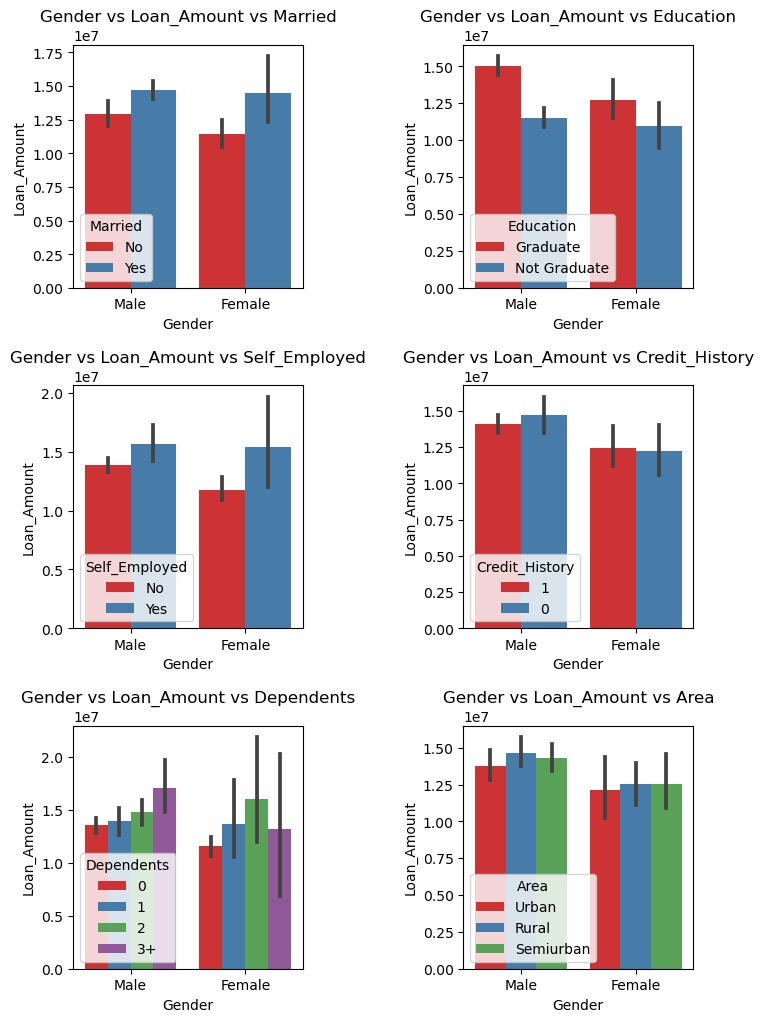

In [19]:
plt.subplots(3, 2,figsize=(8,12))
plt.subplots_adjust(wspace=0.7, hspace=0.4)

plt.subplot(3, 2, 1)
sns.barplot(x = 'Gender', y = 'Loan_Amount', data = train_df, hue = 'Married', palette = 'Set1')
plt.title('Gender vs Loan_Amount vs Married')

plt.subplot(3, 2, 2)
sns.barplot(x = 'Gender', y = 'Loan_Amount', data = train_df, hue = 'Education', palette = 'Set1')
plt.title('Gender vs Loan_Amount vs Education')

plt.subplot(3, 2, 3)
sns.barplot(x = 'Gender', y = 'Loan_Amount', data = train_df, hue = 'Self_Employed', palette = 'Set1')
plt.title('Gender vs Loan_Amount vs Self_Employed')

plt.subplot(3, 2, 4)
sns.barplot(x = 'Gender', y = 'Loan_Amount', data = train_df, hue = 'Credit_History', palette = 'Set1')
plt.title('Gender vs Loan_Amount vs Credit_History')

plt.subplot(3, 2, 5)
sns.barplot(x = 'Gender', y = 'Loan_Amount', data = train_df, hue = 'Dependents', palette = 'Set1')
plt.title('Gender vs Loan_Amount vs Dependents')

plt.subplot(3, 2, 6)
sns.barplot(x = 'Gender', y = 'Loan_Amount', data = train_df, hue = 'Area', palette = 'Set1')
plt.title('Gender vs Loan_Amount vs Area')

plt.show()

#### Column : Married

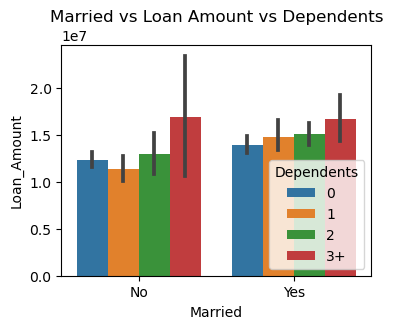

In [20]:
plt.figure(figsize=(4,3))
sns.barplot(x = 'Married', y = 'Loan_Amount', data = train_df, hue = 'Dependents')
plt.title('Married vs Loan Amount vs Dependents')
plt.show()

#### Column : Education

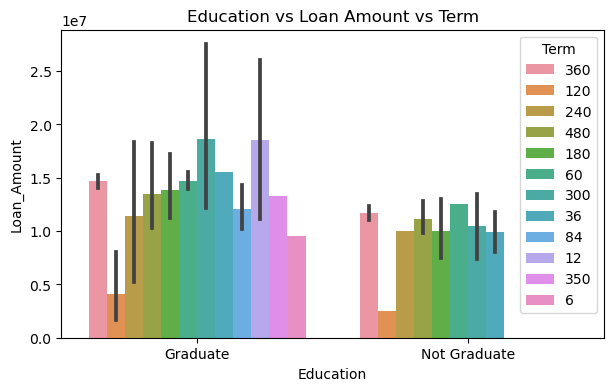

In [21]:
plt.figure(figsize=(7,4))
sns.barplot(x = 'Education', y = 'Loan_Amount', data = train_df, hue = 'Term')
plt.title('Education vs Loan Amount vs Term')
plt.show()

#### Column : Dependents, Self_Employed, Credit_History, Area

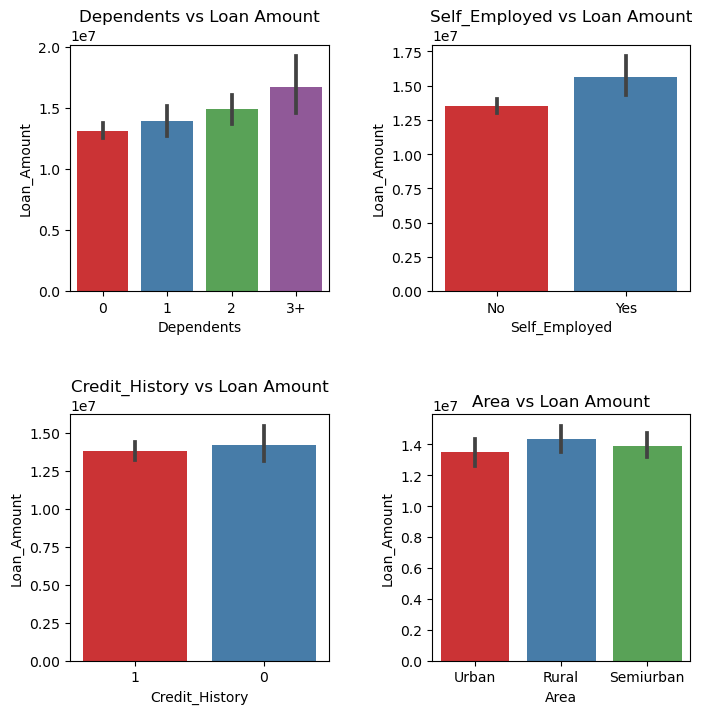

In [22]:
plt.subplots(2,2,figsize=(8,8))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

k = 1
for i in ['Dependents', 'Self_Employed', 'Credit_History', 'Area']:
    plt.subplot(2,2,k)
    sns.barplot(x = i, y = 'Loan_Amount', data = train_df, palette='Set1')
    plt.title(f'{i} vs Loan Amount')
    k += 1

plt.show()

#### Column : Term

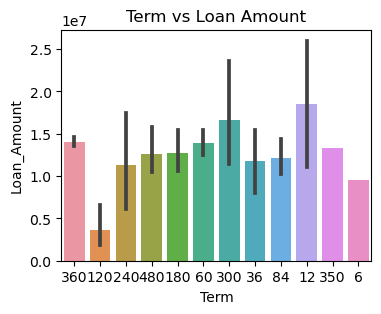

In [23]:
plt.figure(figsize=(4,3))
sns.barplot(x = 'Term', y = 'Loan_Amount', data = train_df)
plt.title('Term vs Loan Amount')
plt.show()

#### Column : Applicant_Income, Coapplicant_Income, Loan_Amount

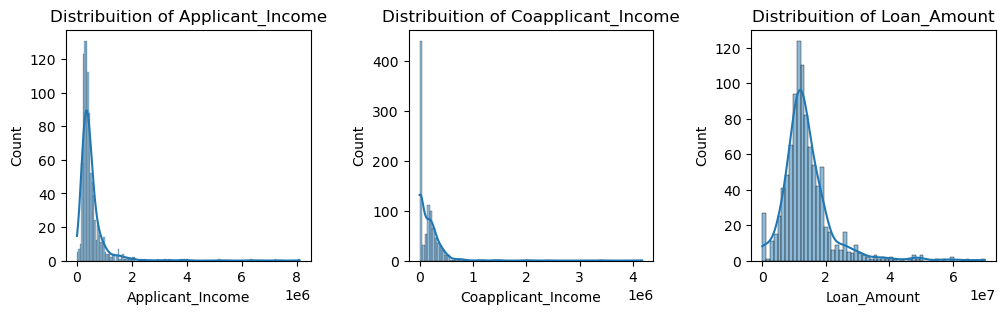

In [24]:
plt.subplots(1,3,figsize=(12,3))
plt.subplots_adjust(wspace=0.4)
k = 1
for i in num_cols[:3]:
    plt.subplot(1,3,k)
    sns.histplot(x = i, data = train_df, kde=True)
    plt.title(f'Distribuition of {i}')
    k += 1

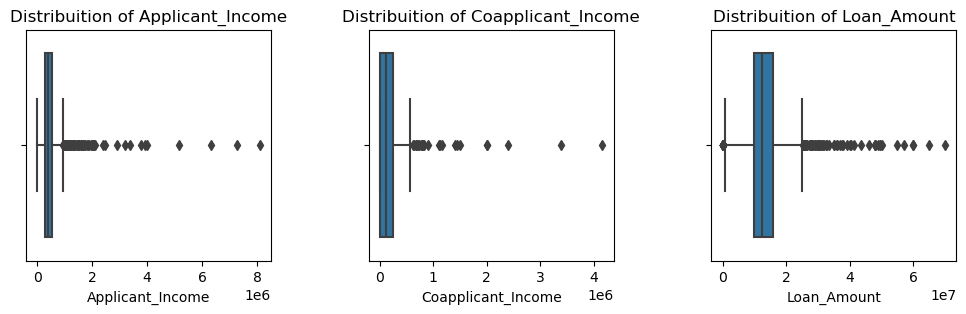

In [25]:
plt.subplots(1,3,figsize=(12,3))
plt.subplots_adjust(wspace=0.4)
k = 1
for i in num_cols[:3]:
    plt.subplot(1,3,k)
    sns.boxplot(x = i, data = train_df)
    plt.title(f'Distribuition of {i}')
    k += 1

## Handling of Outliers

#### Applicant Income

In [26]:
Q1 = np.quantile(train_df['Applicant_Income'], 0.25)
Q3 = np.quantile(train_df['Applicant_Income'], 0.75)
IQR = Q3 - Q1
max = (1.5 * IQR + Q3)
min = (Q1 - 1.5 * IQR)
train_df['Applicant_Income'] = train_df['Applicant_Income'].apply(lambda x: x if x <= max else max)

#### Coapplicant Income

In [27]:
Q1 = np.quantile(train_df['Coapplicant_Income'], 0.25)
Q3 = np.quantile(train_df['Coapplicant_Income'], 0.75)
IQR = Q3 - Q1
max = (1.5 * IQR + Q3)
min = (Q1 - 1.5 * IQR)
train_df['Coapplicant_Income'] = train_df['Coapplicant_Income'].apply(lambda x: x if x <= max else max)

#### Loan Amount

In [28]:
Q1 = np.quantile(train_df['Loan_Amount'], 0.25)
Q3 = np.quantile(train_df['Loan_Amount'], 0.75)
IQR = Q3 - Q1
max = (1.5 * IQR + Q3)
min = (Q1 - 1.5 * IQR)
train_df['Loan_Amount'] = train_df['Loan_Amount'].apply(lambda x: np.where((x <= max and x >= min), x, np.where(x <= min, min, max)))

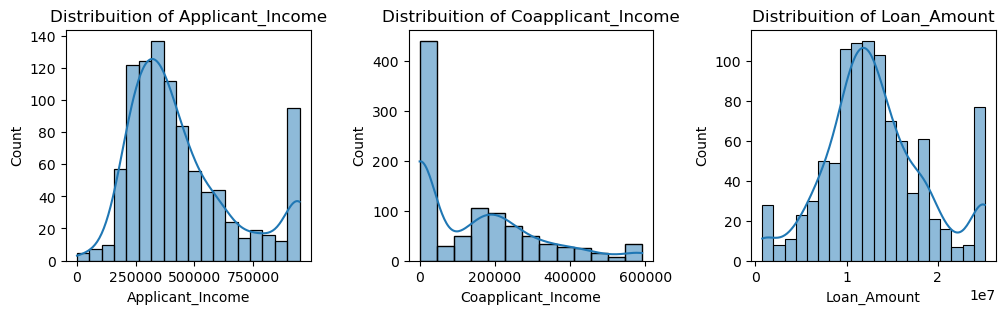

In [29]:
plt.subplots(1,3,figsize=(12,3))
plt.subplots_adjust(wspace=0.4)
k = 1
for i in num_cols[:3]:
    plt.subplot(1,3,k)
    sns.histplot(x = i, data = train_df, kde=True)
    plt.title(f'Distribuition of {i}')
    k += 1

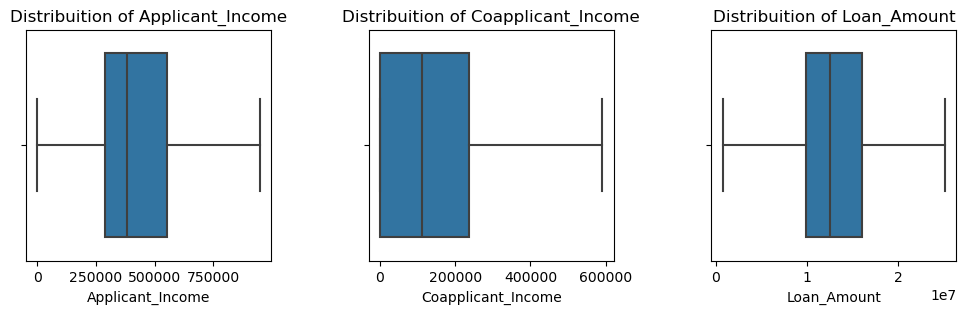

In [30]:
plt.subplots(1,3,figsize=(12,3))
plt.subplots_adjust(wspace=0.4)
k = 1
for i in num_cols[:3]:
    plt.subplot(1,3,k)
    sns.boxplot(x = i, data = train_df)
    plt.title(f'Distribuition of {i}')
    k += 1

## Statistics

#### Quantiles

In [31]:
train_df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount
count,981.00000,981.000000,9.810000e+02
mean,446630.88685,142364.415901,1.318716e+07
std,226830.57402,161935.644361,5.582118e+06
min,0.00000,0.000000,7.500000e+05
25%,287500.00000,0.000000,9.900000e+06
50%,380000.00000,111000.000000,1.250000e+07
75%,551600.00000,236500.000000,1.600000e+07
max,947750.00000,591250.000000,2.515000e+07


#### Correlation

In [32]:
train_df.select_dtypes(include=['int', 'float']).corr()

,Applicant_Income,Coapplicant_Income,Loan_Amount
Applicant_Income,1.000000,-0.233378,0.479387
Coapplicant_Income,-0.233378,1.000000,0.232605
Loan_Amount,0.479387,0.232605,1.000000


## Data Preprocessing

#### Column Transformer

In [33]:
train_df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [34]:
areas = train_df['Area'].unique()
educations = train_df['Education'].unique()

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

ct = ColumnTransformer(transformers=[('scaler', StandardScaler(), ['Applicant_Income', 'Coapplicant_Income']),
                                     ('encoder', OrdinalEncoder(categories=[['Female','Male'],['6','12','36','60','84','120','180','240','300','350','360','480'],
                                                                            ['No','Yes'],['0','1','2','3+'],['0','1'],['No','Yes'],['Rural','Semiurban','Urban'],
                                                                            ['Not Graduate','Graduate']]),
                                      ['Gender', 'Term', 'Married', 'Dependents', 'Credit_History', 'Self_Employed', 'Area', 'Education'])
                                    ], remainder='passthrough', sparse_threshold=0)
ct

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('scaler', StandardScaler(),
                                 ['Applicant_Income', 'Coapplicant_Income']),
                                ('encoder',
                                 OrdinalEncoder(categories=[['Female', 'Male'],
                                                            ['6', '12', '36',
                                                             '60', '84', '120',
                                                             '180', '240',
                                                             '300', '350',
                                                             '360', '480'],
                                                            ['No', 'Yes'],
                                                            ['0', '1', '2',
                                                             '3+'],
                                                            ['0', '1'],
                                                            ['No', 'Yes'],
                                                            ['Rural',
                                                             'Semiurban',
                                                             'Urban'],
                                                            ['Not Graduate',
                                                             'Graduate']]),
                                 ['Gender', 'Term', 'Married', 'Dependents',
                                  'Credit_History', 'Self_Employed', 'Area',
                                  'Education'])])

## Data Splitting

In [36]:
X = train_df.drop(columns=['Loan_Amount'])
Y = train_df['Loan_Amount']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, y_train.shape

((784, 10), (784,))

## Model Selection

#### Estimators

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = {
    'linreg': LinearRegression(),
    'dt': DecisionTreeRegressor(),
    'random': RandomForestRegressor(),
    'hgbt': HistGradientBoostingRegressor(),
    'gbt': GradientBoostingRegressor(),
    'extra': ExtraTreesRegressor(),
    'pls': PLSRegression(),
    'svm': SVR(),
    'knn': KNeighborsRegressor()
}

#### Models Training

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import PCA

for key in models.keys():
    pipe = Pipeline([('ct', ct), ('pca', PCA(n_components=8)), (f'{key}', models[key])])
    pipe.fit(X_train, y_train)
    print(f'{key}: {pipe.score(X,Y)}')
    print('----------------------------------')

linreg: 0.37357686903569354
----------------------------------
dt: 0.732686158039466
----------------------------------
random: 0.7864592469014395
----------------------------------
hgbt: 0.7721444615524989
----------------------------------
gbt: 0.6268514086009791
----------------------------------
extra: 0.8471686384302692
----------------------------------
pls: 0.37357686903569354
----------------------------------
svm: -0.019898704498352515
----------------------------------
knn: 0.47289871947594075
----------------------------------


## Model Building

In [41]:
pipe = Pipeline(steps = [('ct', ct), ('pca', PCA(n_components=8)), ('extra trees', ExtraTreesRegressor())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Applicant_Income',
                                                   'Coapplicant_Income']),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['Female',
                                                                              'Male'],
                                                                             ['6',
                                                                              '12',
                                                                              '36',
                                                                              '60',
                                                                              '84',
                                                                              '120',
                                                                              '180',
                                                                              '240',
                                                                              '300',
                                                                              '350',
                                                                              '360',
                                                                              '480'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['0',
                                                                              '1',
                                                                              '2',
                                                                              '3+'],
                                                                             ['0',
                                                                              '1'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             ['Rural',
                                                                              'Semiurban',
                                                                              'Urban'],
                                                                             ['Not '
                                                                              'Graduate',
                                                                              'Graduate']]),
                                                  ['Gender', 'Term', 'Married',
                                                   'Dependents',
                                                   'Credit_History',
                                                   'Self_Employed', 'Area',
                                                   'Education'])])),
                ('pca', PCA(n_components=8)),
                ('extra trees', ExtraTreesRegressor())])

## Model Evaluation

In [42]:
pipe.score(X, Y)

0.8475767391620022